{'month': '2019-03', 'type': 'moneySales', 'format': 'graph', 'prediction': 'True'}


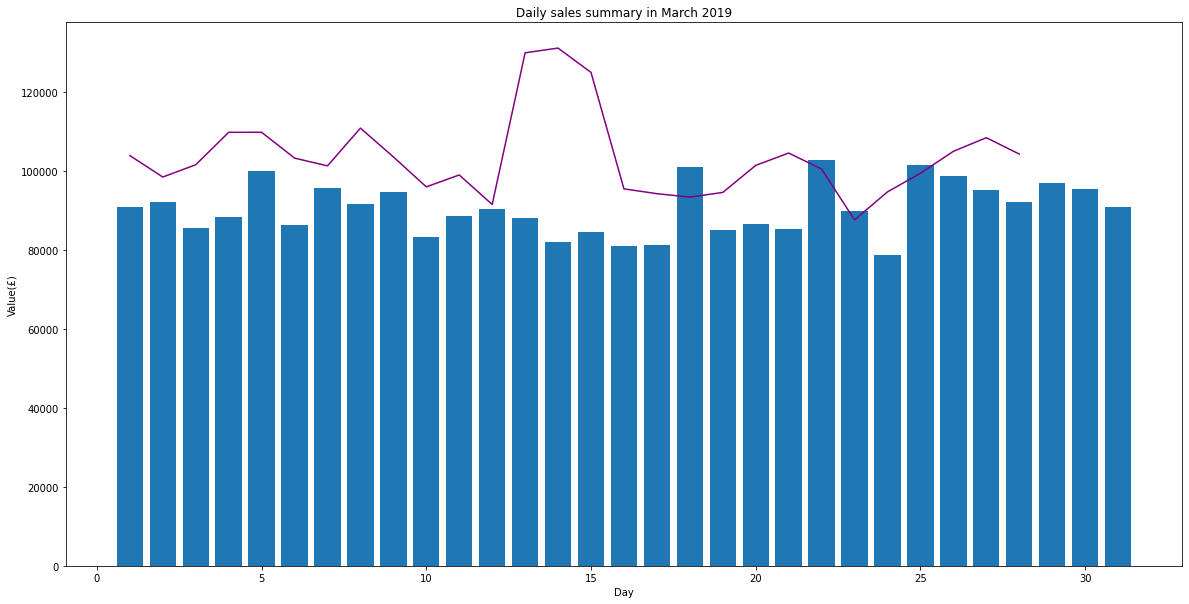

In [33]:
from ast import arg
from time import time
import mysql.connector as dbCon
import pandas as pd
import numpy as np
import os
import glob
import pandas as pd
import datetime
import math
import json
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import sys

conn = dbCon.connect(host="localhost", user="root", password="cqX*5gk6^hvNFPvE", database="dsp")
argDict = {'month': '2019-03', 'type': 'moneySales', 'format':'graph', 'prediction': 'True'}
print(argDict)
if bool(argDict['month']): #month
    date = datetime.datetime.strptime(argDict['month'], '%Y-%m')
    month = date.month
    year = date.year
    monthNames = ["January",
                "Febuary",
                "March",
                "April",
                "May",
                "June",
                "July",
                "August",
                "September",
                "October",
                "November",
                "December"]

    if argDict['type'] == 'moneySales':
        sql = "SELECT DayT, Value FROM money_sales WHERE MONTH(DayT) = %s AND YEAR(DayT) = %s"
        salesCursor = conn.cursor()
        param = (month, year)
        salesCursor.execute(sql, param)
        salesResult = salesCursor.fetchall()
        salesCursor.close()
        moneyDF = pd.DataFrame(salesResult, columns=['Date', 'Value'])
        moneyDF['Day'] = pd.to_datetime(moneyDF['Date']).dt.day
        dailyDF = moneyDF.groupby('Day')['Value'].sum().reset_index()
        

        if argDict['format'] == 'graph':
            plt.figure(figsize=(20,10))
            plt.bar(x = dailyDF['Day'], height = dailyDF['Value'])
            plt.title('Daily sales summary in ' + monthNames[month - 1] + ' ' + str(year))
            plt.xlabel('Day')
            plt.ylabel('Value(£)')
            

            if 'previous' in argDict:
                preVCursor = conn.cursor()
                paramPrev = (month - 1, year)
                preVCursor.execute(sql, paramPrev)
                prevResult = preVCursor.fetchall()
                preVCursor.close()
                prevMoneyDF = pd.DataFrame(data=prevResult, columns=['Date', 'Value'])
                prevMoneyDF['Day'] = pd.to_datetime(prevMoneyDF['Date']).dt.day
                dailyPrevMoneyDF = prevMoneyDF.groupby('Day')['Value'].sum().reset_index()
                plt.plot(dailyPrevMoneyDF['Day'], dailyPrevMoneyDF['Value'], c = 'blue')

            if 'prediction' in argDict:
                preDCursor = conn.cursor()
                preDsql = 'SELECT DayT, Predicted_Value from money_pred WHERE MONTH(DayT) = %s AND YEAR(DayT) = %s'
                preDCursor.execute(preDsql, param)
                preDResult = preDCursor.fetchall()
                preDCursor.close()
                preDMoneyDF = pd.DataFrame(data=preDResult, columns=['Date', 'PredValue'])
                preDMoneyDF['Day'] = pd.to_datetime(prevMoneyDF['Date']).dt.day
                dailyPreDMoneyDF = preDMoneyDF.groupby('Day')['PredValue'].sum().reset_index()
                plt.plot(dailyPreDMoneyDF['Day'], dailyPreDMoneyDF['PredValue'], c = 'purple')

            #plt.savefig('graph.jpg', bbox_inches = 'tight')

 
conn.close()

In [5]:
text = '2019-01-04'
text = text[:6] + str(int(text[6]) + 1) + text[7:]
text

'2019-02-04'